## Simple Linear Regression: Height Prediction Using Weight

In [1]:
## this is a some pythoon library  use to perfom eda 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("height_weight_60.csv")
df.head()

,Height_cm,Weight_kg
0,170.0,67.6
1,163.6,62.7
2,171.5,66.0
3,180.2,74.2
4,162.7,66.8


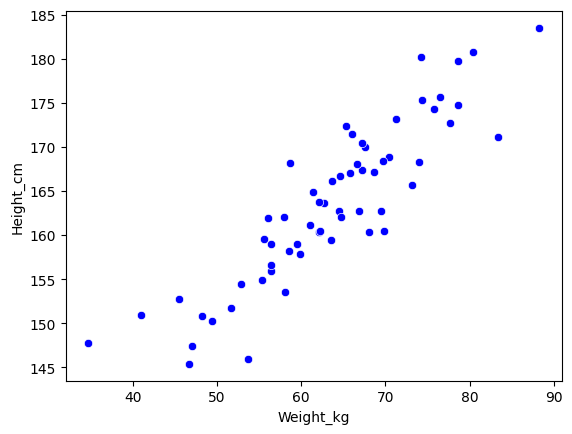

In [3]:
## scatter plot 
sns.scatterplot(x ='Weight_kg' , y ='Height_cm' , data =df, color='blue')
plt.show()

In [4]:
## finding correlation 
df.corr()

,Height_cm,Weight_kg
Height_cm,1.000000,0.894957
Weight_kg,0.894957,1.000000


In [5]:
df.head()
x =df[['Weight_kg']] ## independent feature should be in df form 
y = df['Height_cm'] ## dependent feature can be in series or in dataframe

In [6]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [7]:
# standaridation = for big dataset we applies z score  becuse finding gloal minima with large data set take time and power 
from sklearn.preprocessing import StandardScaler


In [8]:
scaler= StandardScaler()
scaler.fit(df)
x_train = scaler.fit_transform(x_train)

In [9]:
x_test = scaler.transform(x_test)

In [10]:
print("_________________________________________________")
print(x_test)

_________________________________________________
[[ 0.46520298]
 [ 0.64253181]
 [ 0.55853394]
 [-0.2627785 ]
 [-0.83209735]
 [ 1.09052041]
 [-0.91609522]
 [ 0.661198  ]
 [ 0.4278706 ]
 [-0.60810305]
 [ 0.67053109]
 [-0.37477565]
 [ 2.39715384]
 [ 1.08118732]
 [-0.38410875]]


In [11]:
## linear regression 
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression(n_jobs = -1)

In [13]:
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [14]:
print("coeficents or slope ", reg.coef_)
print("intercept ", reg.intercept_)

coeficents or slope  [7.98353028]
intercept  162.8


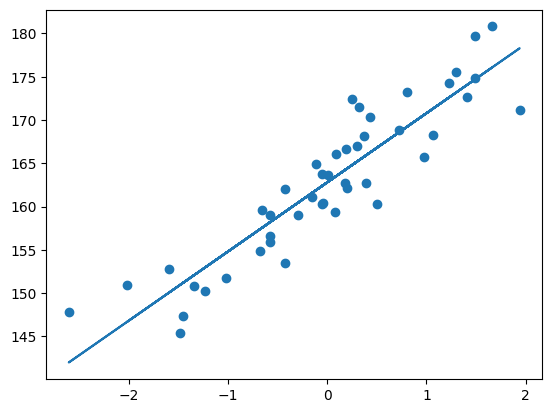

In [15]:
## with respect to traing data i plot the best fiit line
plt.scatter(x_train , y_train)
plt.plot(x_train ,reg.predict(x_train))
plt.show()

## prediction of test data
1. predicted height output = intercept + coef_(weight)
2. y_pred_test = 162.8 + 7.98(x_test)

In [16]:
## prediction for test data
y_predict = reg.predict(x_test)

In [17]:
## perfomance matrix 
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
mse = mean_squared_error(y_test , y_predict)
mae = mean_absolute_error(y_test , y_predict)
rmse = np.sqrt(mse)
print(mse,
     mae,
     rmse)

26.539099698562488 4.02555871902164 5.151611369131263


# r - squre
r^2 = 1 - ssr/sst

In [19]:
from sklearn.metrics import r2_score

In [20]:
score = r2_score(y_test , y_predict)
print(score)

0.7040093589959838


# Adjusted R²
## Adjusted R² = 1 - ( (1 - R²) * (n - 1) / (n - k - 1) )

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

#  LR to predict the height of the person 

In [21]:
reg.predict(scaler.transform([[65]]))

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([164.57667469])

In [22]:
reg.predict(scaler.transform([[80]]))

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([175.7533328])

In [23]:
reg.predict(scaler.transform([[75]]))

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([172.0277801])

In [24]:
reg.predict(scaler.transform([[85]]))

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([179.4788855])

In [25]:
reg.predict(scaler.transform([[44]]))

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([148.92935333])

In [26]:
reg.predict(scaler.transform([[90]]))

C:\Users\Lenovo\anaconda3\envs\atulshahi\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([183.20443821])